# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [462]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance
import random
from sklearn.metrics import mean_squared_error
import math

In [463]:
#Extraction of customer data from csv file
data = pd.read_csv('Customer data.csv')

data.shape
import random
data.head(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2


In [464]:
numpy_array = data.to_numpy()

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [465]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
#Distance time is ecluidian or pearson correlation
#cluster_centroids is array(having all centroids) of arrays(having on centroid with all features)
#data_points is array(having all data points) of arrays(having a point with all features)
    NumberOfClusters=len(Cluster_Centroids)
    NumberOfDatapoints=len(Data_points)
    #DataFrame with rows equal to data points columns equal K 
    df = pd.DataFrame(index=range(NumberOfDatapoints),columns=range(NumberOfClusters))
    if Distance_Type=="Ecludian":
        i=0
        #loop on every clustercentroid 
        while i<NumberOfClusters:
            k=0
            IthCentroid=Cluster_Centroids[i]
            #loop on all data points with every clustercentroid separately  
            while k<NumberOfDatapoints:
                kthDatapoint=Data_points[k]
                #Distance between the I+1 centroid and the k+1 datapoint  
                distancee=distance.euclidean(IthCentroid, kthDatapoint)
                df.loc[k][i]=distancee
                k=k+1
            i=i+1
        
        
    else:
        i=3
      
    Cluster_Distance= df
    return Cluster_Distance 


In [466]:
s=GUC_Distance ([[0,0],[5,5]],[[0,0],[1,2],[5,5]], "Ecludian" )



> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [467]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
           # write code for intial cluster heads here
       
        PreviousCentroids=random_centroid_initlization(Data_points, Number_of_Clusters)
        #print("InitialCentroids")
        #print(PreviousCentroids)
        previousmeansum=9999999999999999
           # write your your loop 
        [meansum,NewCentroids,Index]=helper_GUC_Kmean (PreviousCentroids, Data_points, Distance_Type)

            
        
        
        counter=0
        #print(meansum)
        while previousmeansum-meansum>0.00000001:
            #print(meansum,previousmeansum)
            previousmeansum=meansum
            counter=counter+1
           
            
            [meansum,NewCentroids,Index]=helper_GUC_Kmean(NewCentroids, Data_points, Distance_Type)
        
      
        return [NewCentroids,counter,Index,meansum]
        #return [ Final_Cluster_Distance , Cluster_Metric ] 

In [468]:
a = np.array([1.0, 3.5, -6.3])
b = np.array([4.5, 1.6,  1.2])

dist = np.linalg.norm(a-b)
dist,dist**2
sum(a)

-1.7999999999999998

In [653]:
def random_centroid_initlization(Data_points, Number_of_Clusters):
    
        Dataframetorandomize=pd.DataFrame(Data_points)
        NumberOfFeatures=len(Data_points[0])
        PreviousCentroids=[] #Array that will be filled with all initial centroids\n",
    
        MaxValues=Dataframetorandomize.max() #every feature and corresponding max value
        MinValues=Dataframetorandomize.min() #every feature and corresponding min values
        
        ii=0
        while ii<2:
            k=0
        #loop for appending needed number centroids\n",
            PreviousCentroids=[]
            while k<Number_of_Clusters:
                i=0
            #loop for finding random numbers to be assigned to centroids\n",
                Centr=[]  #array that will be filled with every centroid\n",
                while i<NumberOfFeatures:
                    Maximum=int(MaxValues[i])  #get min and max value of every feature to choose a random number for each for \n",
                    Minimum=int(MinValues[i])             #centroid assignment \n",
                    
                    randomlist = random.uniform(Minimum, Maximum)
                    #check that random list is not found previously in centr array 
                    #which means that there must not be two initial same centroids
                    #while (randomlist in PreviousCentroids)== True:
                        #randomlist = random.randrange(Minimum, Maximum)
                    Centr.append(randomlist)
                    i=i+1
                while (Centr in PreviousCentroids)== True:
                    #print("hey")
                    #print(randomlist)
                    i=0
            #loop for finding random numbers to be assigned to centroids\n",
                    Centr=[]  #array that will be filled with every centroid\n",
                    while i<NumberOfFeatures:
                        Maximum=int(MaxValues[i])  #get min and max value of every feature to choose a random number for each for \n",
                        Minimum=int(MinValues[i])             #centroid assignment \n",
                    
                        randomlist = random.randrange(Minimum, Maximum)
                        #print(randomlist)
                    #check that random list is not found previously in centr array 
                    #which means that there must not be two initial same centroids
                    #while (randomlist in PreviousCentroids)== True:
                        #randomlist = random.randrange(Minimum, Maximum)
                        Centr.append(randomlist)
                        i=i+1
                    
                PreviousCentroids.append(Centr)
                k=k+1
            
            ii=ii+1
        print("initial centroids")
        print(PreviousCentroids)
        return PreviousCentroids

In [518]:
array = [[1,2], [2,3], [3,0]]

exist = [2,3] in array

print(exist)

True


In [470]:
random_centroid_initlization([[1,0],[1,2],[3,3]], 2)

[[1, 2], [2, 1]]

In [471]:
import numpy
GUC_Kmean ( [[0,0],[1,2],[3,3],[3,3]], 2,  "Ecludian" )

[[array([2.33333333, 2.66666667]), array([0., 0.])],
 1,
 [array([1], dtype=int64),
  array([0], dtype=int64),
  array([0], dtype=int64),
  array([0], dtype=int64)],
 1.6666666666666665]

In [666]:
import numpy
[NewCentroids,counter,Index,meansum]=GUC_Kmean ( [[2],[3],[4],[10],[11],[12],[20],[25],[30]], 2,  "Ecludian" )

np.asarray(Index)
#print(NewCentroids)
#print(Index)
print(meansum)
[NewCentroids,counter,Index,meansum]=GUC_Kmean ( [[2],[3],[4],[10],[11],[12],[20],[25],[30]], 3,  "Ecludian" )
np.asarray(Index)
#print(NewCentroids)
#print(Index)
print(meansum)
[NewCentroids,counter,Index,meansum]=GUC_Kmean ( [[2],[3],[4],[10],[11],[12],[20],[25],[30]], 4,  "Ecludian" )
np.asarray(Index)
#print(NewCentroids)
#print(Index)
print(meansum)

initial centroids
[[15.155049069090644], [8.13693817830345]]
16.666666666666668
initial centroids
[[25.524855297531634], [3.3408228794792754], [26.497584944906365]]
82.54166666666667
initial centroids
[[23.285498291765265], [5.041750627100994], [19.063097580651217], [16.564035906074274]]
28.5952380952381


In [663]:
def helper_GUC_Kmean (Centroids, Data_points, Distance_Type):
    
        s=GUC_Distance ( Centroids, Data_points, Distance_Type ) #s is matrix having distances between points and each centroid\n",
        MinValueOfEveryRow = s.min(axis = 1)
        
        n=0
        distSqaured=0
        s=pd.DataFrame(s)
        Index=[]
        #print(s)
        #print("oldcentroids")
        #print(Centroids)
        while n<len(s):
            k=s.iloc[n].to_numpy()
            
            min_value = min(k) 
            result = numpy.where(k == numpy.amin(k))
            Index.append(result[0])
            n=n+1
        NewCentroids=[]   
        i=0
        meansum_eachCluster=[]
        addition=[]
      
        Number_of_Clusters=len(Centroids) #omar
        while i<Number_of_Clusters:
            sum1=0
            n=0
            array=[]
            addition=[]
            while n<len(Data_points):
                if Index[n].any()==i:
                #if Index[n]==i:
                    array.append(Data_points[n])
                    #array having lenght of datapoints having indices
                    
                        
                n=n+1
            if(len(array)==0): 
                    #print(Centroids[i])
                    NewCentroids.append(Centroids[i])
            else:
                means=np.mean(array, axis=0)
                NewCentroids.append(means)
            
            #Get distance between each datapoint and it's centroid sqaured
            s=0
            while s<len(array):
                b=NewCentroids[i]
                a=array[s]
                dist = np.linalg.norm(a-b)
                distSquared=dist**2
                addition.append(distSquared)
                s=s+1
            additionnumpy = numpy.array(addition)
            summ=sum(additionnumpy)
            meansum_eachCluster.append(summ)
            #meansum=sum(meansum_eachCluster)/len(Data_points)
            addition=[] #added
            i=i+1
        meansum=sum(meansum_eachCluster)/len(Data_points)
     
    
        
        return meansum,NewCentroids,Index
     


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [478]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [479]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    km=np.asarray(km)
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            
            temp=np.where(km==i)[0]
            #print(temp)
           
            plt.scatter(X[temp,0],X[temp,1],c = color[i],alpha = alpha,s=s)
           # plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

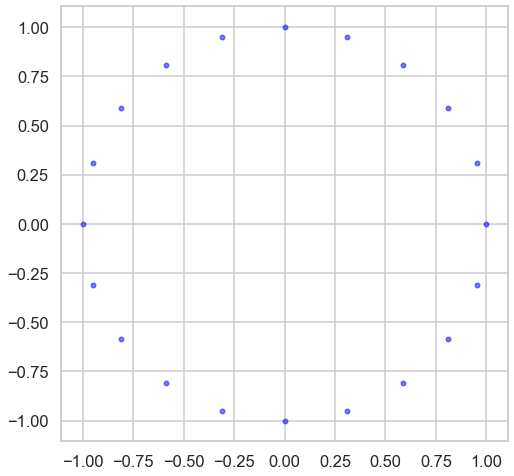

In [618]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)




In [639]:
x2 = [2,3,4]
y2 = []
yara=2
while yara<6:
    [k,m,Index,dist]=GUC_Kmean ( X, yara,  "Ecludian" )
    yara+=1
    print(dist)
    #display_cluster(X,Index,yara)
    #plt.show()

10.353898579046906
10.353898579046906
10.514641056500944
11.134542388164324


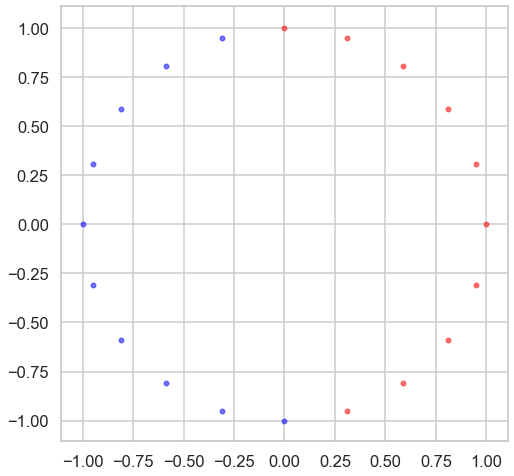

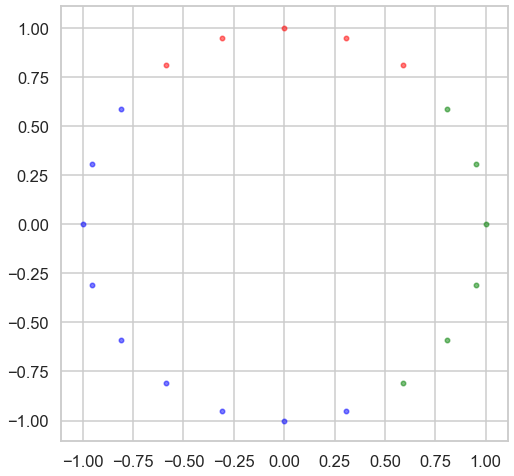

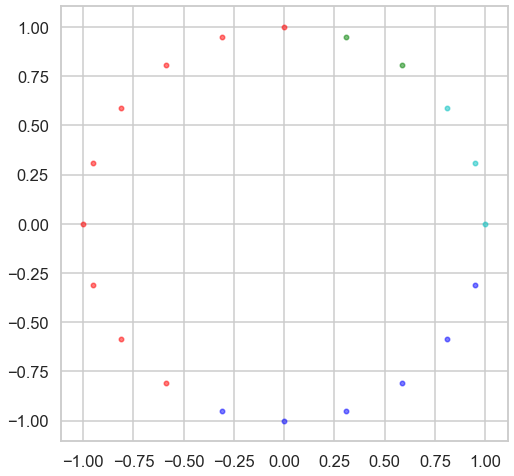

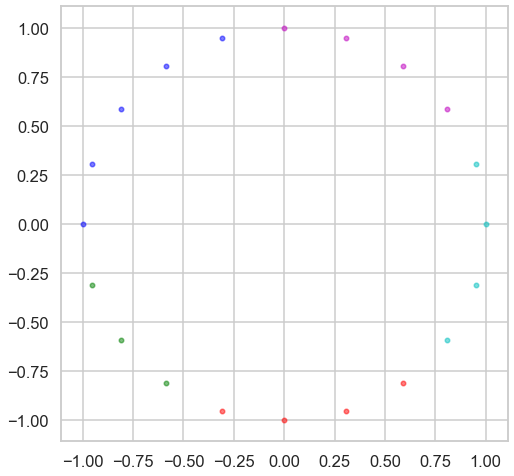

In [599]:
x2 = [2,3,4]
y2 = []
yara=2
while yara<6:
    [k,m,Index,dist]=GUC_Kmean ( X, yara,  "Ecludian" )
    yara+=1
    display_cluster(X,Index,yara)
    plt.show()

2.8035266801992025


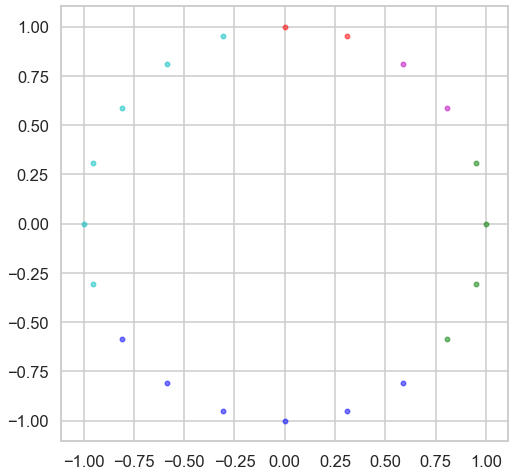

In [570]:
[k,m,Index,dist]=GUC_Kmean ( X, 5,  "Ecludian" )
print(dist)
display_cluster(X,Index,5)

0.9661412689480906


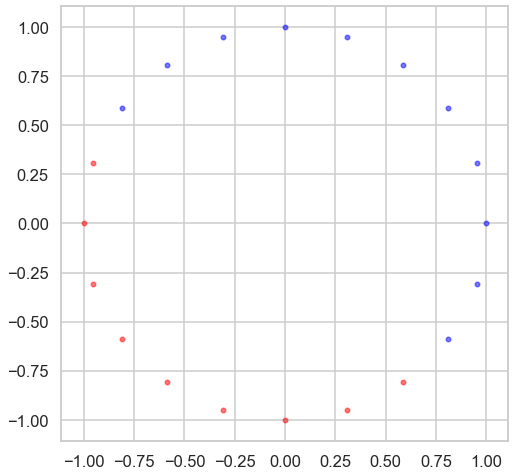

In [359]:
[k,m,Index,dist]=GUC_Kmean ( X, 2,  "Ecludian" )
print(dist)
display_cluster(X,Index,2)

1.398963568678908


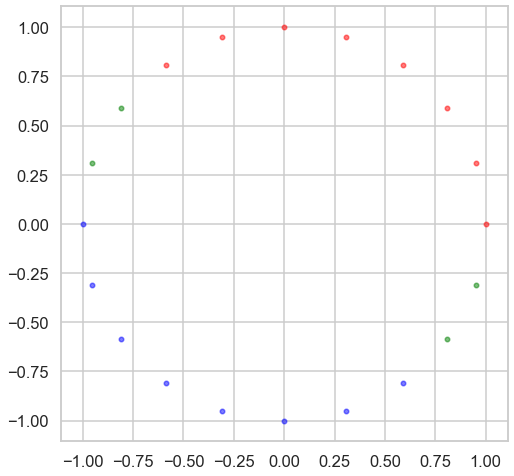

In [360]:
import numpy
[k,m,Index,dist]=GUC_Kmean ( X, 3,  "Ecludian" )
print(dist)
display_cluster(X,Index,3)

2.121925258880223


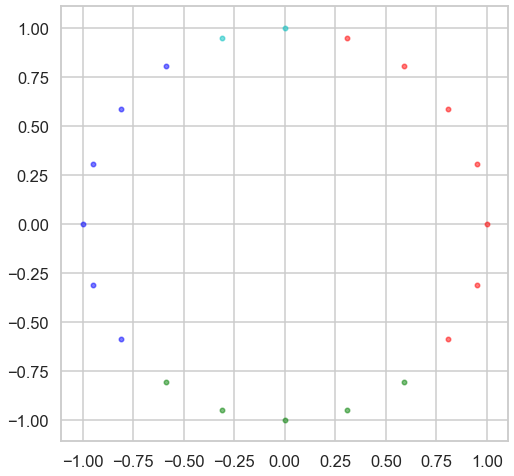

In [362]:
[k,m,Index,dist]=GUC_Kmean ( X, 4,  "Ecludian" )
print(dist)
display_cluster(X,Index,4)

2.8035266801992025


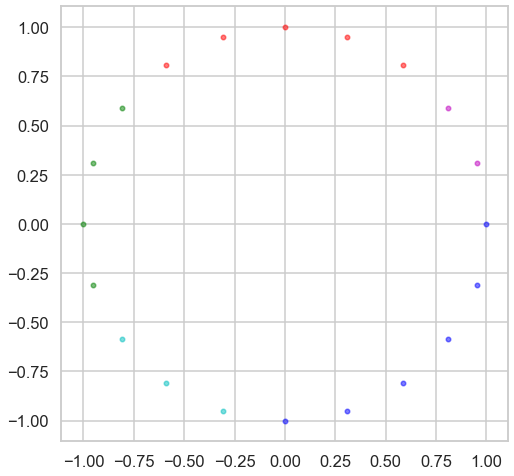

In [395]:
[k,m,Index,dist]=GUC_Kmean ( X, 5,  "Ecludian" )
print(dist)
display_cluster(X,Index,5)

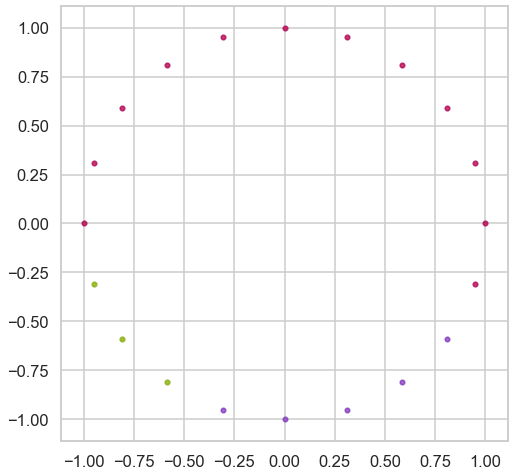

In [426]:
[k,m,Index,dist]=GUC_Kmean ( X, 6,  "Ecludian" )
display_cluster(X,Index,6)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

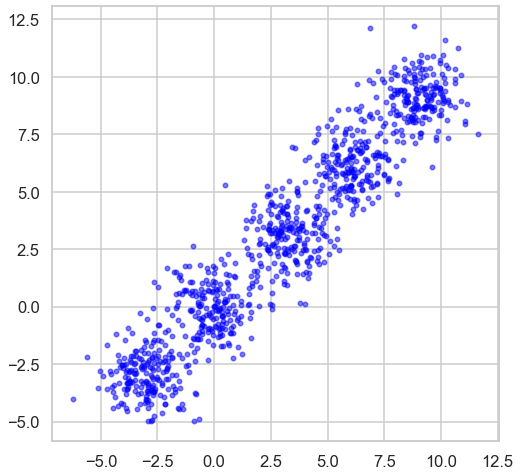

In [627]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)


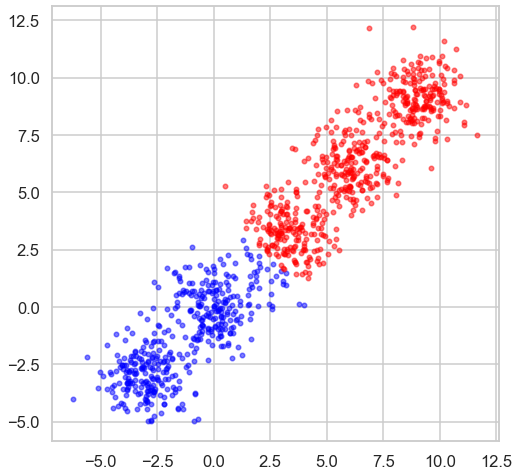

In [436]:
[k,m,Index,dist]=GUC_Kmean ( X, 2,  "Ecludian" )
display_cluster(X,Index,2)

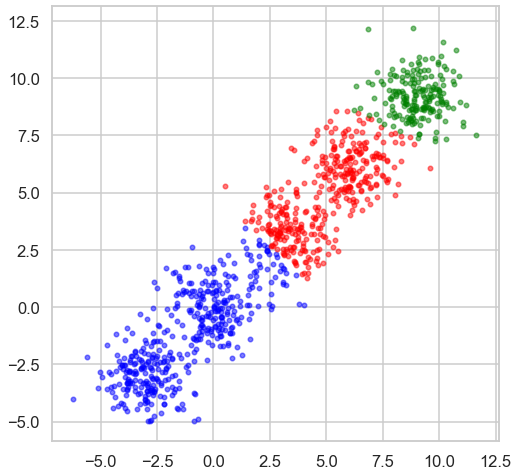

In [437]:
[k,m,Index,dist]=GUC_Kmean ( X, 3,  "Ecludian" )
display_cluster(X,Index,3)

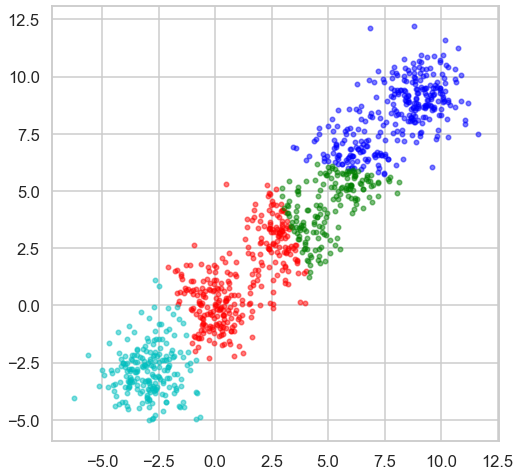

In [442]:
[k,m,Index,dist]=GUC_Kmean ( X, 4,  "Ecludian" )
display_cluster(X,Index,4)

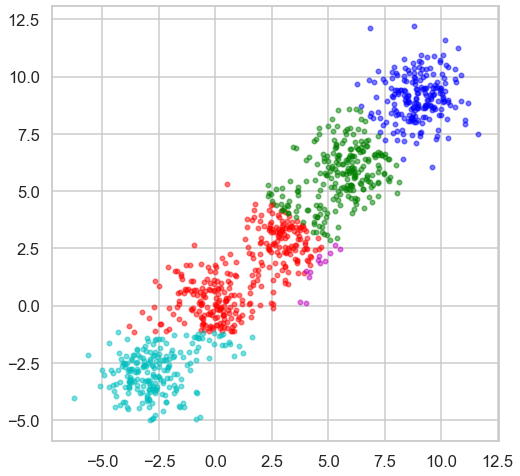

In [613]:
[k,m,Index,dist]=GUC_Kmean ( X, 5,  "Ecludian" )
display_cluster(X,Index,5)

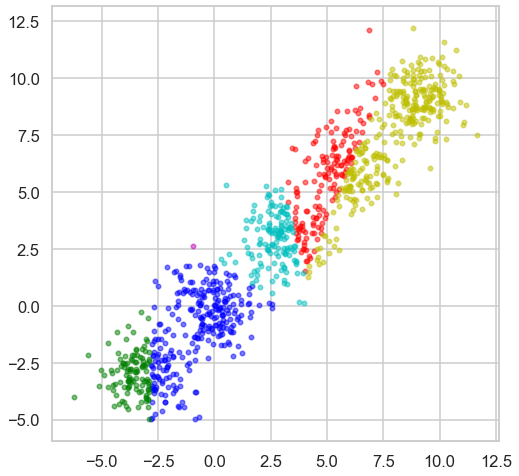

In [461]:
[k,m,Index,dist]=GUC_Kmean ( X, 6,  "Ecludian" )
display_cluster(X,Index,6)

#### 2.3. Example 3 : moons Data Gen and display 

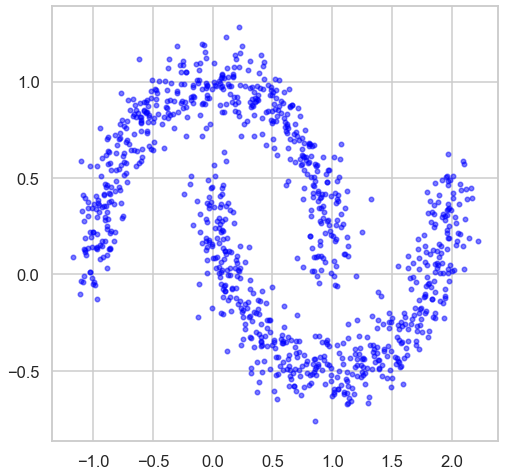

In [600]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

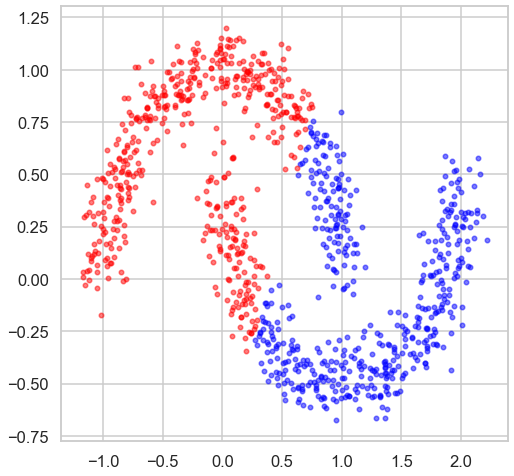

In [432]:
[k,m,Index,d]=GUC_Kmean ( X, 2,  "Ecludian" )
display_cluster(X,Index,2)

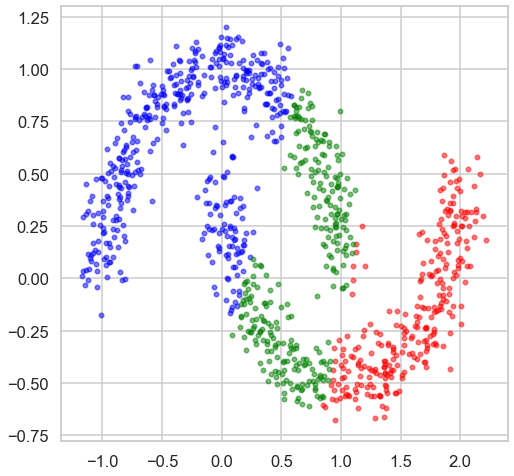

In [433]:
[k,m,Index,d]=GUC_Kmean ( X, 3,  "Ecludian" )
display_cluster(X,Index,3)

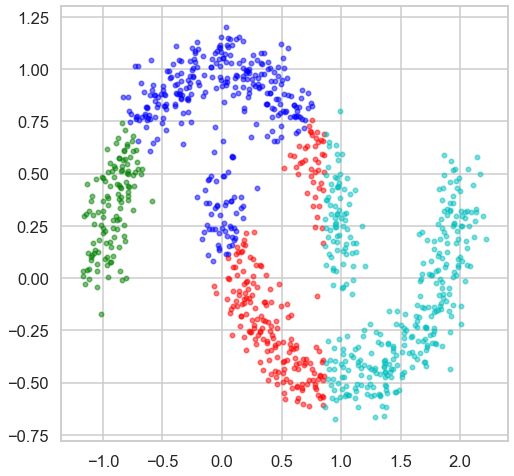

In [434]:
[k,m,Index,dist]=GUC_Kmean ( X, 4,  "Ecludian" )
display_cluster(X,Index,4)

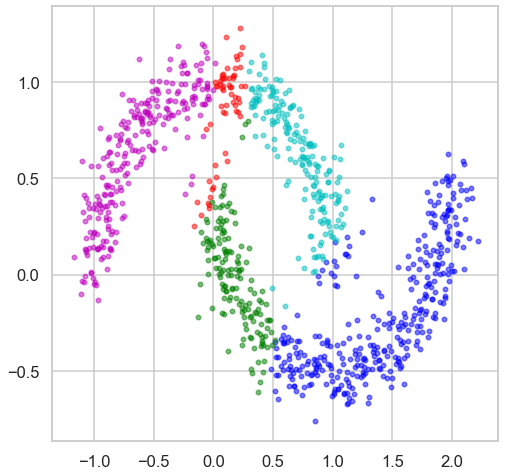

In [601]:
[k,m,Index,dist]=GUC_Kmean ( X, 5,  "Ecludian" )
display_cluster(X,Index,5)

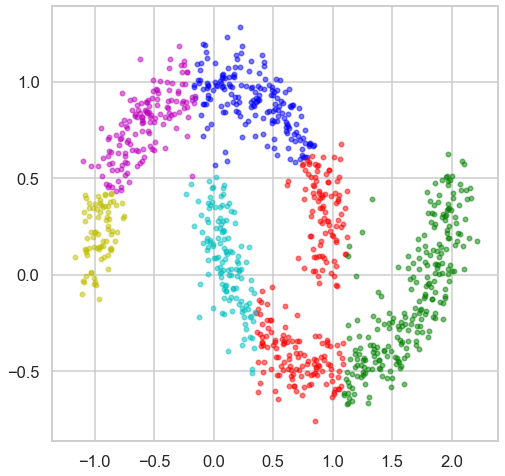

In [602]:
[k,m,Index,dist]=GUC_Kmean ( X, 6,  "Ecludian" )
display_cluster(X,Index,6)

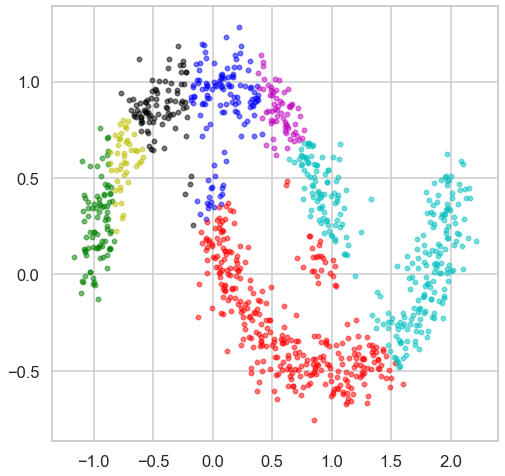

In [606]:
[k,m,Index,dist]=GUC_Kmean ( X, 7,  "Ecludian" )
display_cluster(X,Index,7)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 